# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Partial differential equations
==============================

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 14})

Introduction to Partial differential equations
----------------------------------------------

Partial differential equations (PDEs) involve derivatives of functions
of more than one variable, say $u(x, y)$ or $y(t,
  x)$. Hence more complex behaviour and more interesting physics.

Numerical methods for partial differential equations is an area of
active research. In many interesting problems current methods are
insufficient with the available computing resources.

Will cover some basic, well-understood methods. It is rarely the case
that these methods will be competitive in real-world applications.
However, the concepts introduced should carry over.

### Linear PDEs

Consider only the linear problems

$$A \frac{\partial^2{u}}{\partial{x}^2} + B \frac{\partial^2{u}}{\partial{x}\partial{y}} + C \frac{\partial^2{u}}{\partial{y}^2} + D \frac{\partial{u}}{\partial{x}} + E \frac{\partial{u}}{\partial{y}} = f(x, y),$$

where $u = u(x, y)$ and $A,B,C,D,E$ are constants. Sometimes use the
“evolutionary” notation $y = y(t, x)$, where derivatives will be with
respect to $t$ and $x$.

As with ODEs, unique solution only found when sufficient *boundary
conditions* are given. The number of boundary conditions required
depends on the type of the problem.

For evolution problems ($y = y(t,x)$), boundary conditions specified at
the initial time $t=0$ are called *initial conditions*.

### Hyperbolic equations

*Hyperbolic* equations: associated with wave propagation, central to
hydro- and electro- dynamics. The prototype is the wave equation

$$\partial_{t t} y - c^2 \partial_{x x} y = 0.$$

Information is propagated at *finite speed* $c$.

### Parabolic equations

*Parabolic* equations associated with diffusion problems. The prototype
is the heat equation

$$\partial_{t} y - k \partial_{x x} y = 0.$$

Information is propagated at “*infinite speed*”.

### Elliptic equations

*Elliptic* equations associated with static or stationary problems. The
prototype is Laplace’s equation

$$\partial_{x x} u + \partial_{y y} u = 0.$$

Generalized boundary value problems (in a sense).

### Boundary conditions

Elliptic equations
==================

Finite difference methods for elliptic equations
------------------------------------------------

Take Poisson’s equation with Dirichlet boundary conditions

$$\left\{
\begin{aligned}
  u_{x x} + u_{y y} & = f(x, y), && \text{in } \Omega, \\
  u\big |_{\partial\Omega} & = \phi(x, y), && \text{on }
  \partial\Omega 
\end{aligned}
\right. .$$

Simple approach: replace all derivatives with finite difference
equivalents.

Directly generalizes BVPs. Algorithm:

1.  Introduce grid covering $\Omega$.

2.  Convert PDE to linear system for unknown interior points.

3.  Solve the linear system.

As in BVP case, boundary data is known through $\phi$.

### The grid

Assume that $\Omega$ is a rectangle:

$$x \in [0,a], \quad y \in [0, b].$$

Use $n+2$ points in $x$, $m+2$ in $y$:

$$\begin{aligned}
h_x & = \frac{a}{n + 1}, \\
h_y & = \frac{b}{m + 1}. 
\end{aligned}$$

Location of $(i,j)$ grid point is

$$\begin{pmatrix}
x_{i} \\ y_{j}
\end{pmatrix} =
\begin{pmatrix}
  i h_x \\ j h_y
\end{pmatrix}.$$

### Finite difference formula

Apply central differencing to PDE

$$u_{x x} + u_{y y} = f$$

for the *interior* points $0 < i < n+1$, $0 < j < m+1$. Result:

$$\begin{aligned}
u_{x x} & = \frac{u_{i-1, j} + u_{i+1,j} - 2 u_{i,j}}{h_x^2} +
{\cal O}(h_x^4), \\
u_{y y} & = \frac{u_{i, j-1} + u_{i,j+1} - 2 u_{i,j}}{h_y^2} +
{\cal O}(h_y^4).
\end{aligned}$$

Rearranging and defining $\alpha = ( h_x / h_y )^2$ gives

$$\left[ u_{i-1, j} + u_{i+1,j} - 2 u_{i,j} \right] + \alpha \left[
u_{i, j-1} + u_{i,j+1} - 2 u_{i,j} \right] = h_x^2 f_{i,j}$$

System of $n \times m$ linear equations for $n \times m$ unknowns, as
boundary data ($u_{0, j}$, $u_{n+1,j}$ etc.) is known.

### Ordering

Want to form a linear system

$$A {\boldsymbol{u}} = {\boldsymbol{F}}.$$

But $u_{i,j}$ form a matrix, so re-order entries as vector of unknowns
${\boldsymbol{u}}$.

*Natural ordering by columns*:

$$u_k = u_{i, j}, \quad k \leftrightarrow j + m (i - 1).$$

Natural ordering by *rows*:

$$u_k = u_{i, j}, \quad k \leftrightarrow i + n (j - 1).$$

### The matrix

Apply natural ordering by rows to equation

$$\left[ u_{i-1, j} + u_{i+1,j} - 2 u_{i,j} \right] + \alpha \left[
u_{i, j-1} + u_{i,j+1} - 2 u_{i,j} \right] = h_x^2 f_{i,j}.$$

For $2 \times 3$ example in the notes have

$${\boldsymbol{u}} = [u_{1,1} , u_{1,2} , u_{1,3} , u_{2,1} , u_{2,2} , u_{2,3}]^T$$

and the matrix $A$ given by

$$\begin{pmatrix}
-2 ( 1 + \alpha ) & \alpha & 0 & 1 & 0 & 0 \\
\alpha & -2 ( 1 + \alpha ) & \alpha & 0 & 1 & 0 \\
0 & \alpha & -2 ( 1 + \alpha ) & 0 & 0 & 1 \\
1 & 0 & 0 & -2 ( 1 + \alpha ) & \alpha & 0 \\
0 & 1 & 0 & \alpha & -2 ( 1 + \alpha ) & \alpha \\
0 & 0 & 1 & 0 & \alpha & -2 ( 1 + \alpha )
\end{pmatrix}.$$

The matrix is *sparse* but not tridiagonal.

### Boundary terms and the known vector

In constructing $A$, ignored known elements such as $u_{0,j}$, (will be
moved to RHS). Construct ${\boldsymbol{F}}$ for $2 \times 3$ example
with equation

$$\left[ u_{i-1, j} + u_{i+1,j} - 2 u_{i,j} \right] + \alpha \left[
u_{i, j-1} + u_{i,j+1} - 2 u_{i,j} \right] = h_x^2 f_{i,j}$$

and ordering

$${\boldsymbol{u}} = [u_{1,1} , u_{1,2} , u_{1,3} , u_{2,1} , u_{2,2} , u_{2,3}]^T$$

to find

$${\boldsymbol{F}} =
\begin{pmatrix}
  h_x^2 f_{1,1} - u_{0,1} - \alpha u_{1,0} \\
  h_x^2 f_{1,2} - u_{0,2} \\
  h_x^2 f_{1,3} - u_{0,2} - \alpha u_{1,4} \\
  h_x^2 f_{2,1} - u_{3,1} - \alpha u_{2,0} \\
  h_x^2 f_{2,2} - u_{3,2} \\
  h_x^2 f_{2,3} - u_{3,3} - \alpha u_{2,4} \\
\end{pmatrix}$$

### Example

Solve

$$u_{x x} + u_{y y} = -2 \pi^2 \sin(\pi x) \sin(\pi y)$$

on $(x,y) \in [0,1]^2$ with trivial boundary conditions.

Increasing resolution improves the accuracy steadily and we can see
second order convergence.

In [3]:
interval_x = [0.0, 1.0]
interval_y = [0.0, 1.0]
Nx = 20
Ny = 20

def f(x, y):
    return -2.0 * np.pi**2 * np.sin(np.pi * x) * np.sin(np.pi * y)

hx = (interval_x[1] - interval_x[0]) / (Nx + 1.0)
hy = (interval_y[1] - interval_y[0]) / (Ny + 1.0)
alpha = (hx / hy)**2

x = np.linspace(interval_x[0], interval_x[1], Nx + 2)
y = np.linspace(interval_y[0], interval_y[1], Ny + 2)

X, Y = np.meshgrid(x, y)

U = np.zeros_like(X)

# Boundary conditions are all trivial

A = np.diagflat(-2.0 * (1.0 + alpha) * np.ones((Nx*Ny, 1)))
b = np.zeros((Nx*Ny, 1))

for j in range(Ny):
    for i in range(Nx):
        # Natural ordering by columns
        k = j + Ny*i
        b[k] = hx**2 * f(x[i+1], y[j+1])
        # Boundary conditions are trivial, so no need to adjust the RHS vector
        if (j > 0):
            A[k, k-1] = alpha
        if (j < Ny-1):
            A[k, k+1] = alpha
        if (i > 0):
            A[j + Ny*(i-1), k] = 1.0
        if (i < Ny-1):
            A[j + Ny*(i+1), k] = 1.0

Uint = np.linalg.solve(A, b)

for j in range(Ny):
    for i in range(Nx):
        # Natural ordering by columns
        k = j + Ny*i
        U[i+1, j+1] = Uint[k]

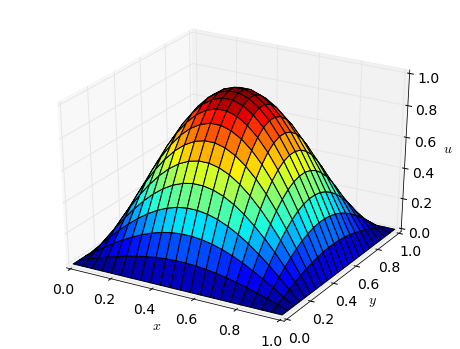

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, U, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
plt.show()

### Example: 2

The equation

$$\begin{aligned}
u_{x x} + u_{y y} & = x e^y, & (x,y) & \in [0,1]^2, \\
u & = 0 & \text{on } x & = 0, \\
u & = e^y & \text{on } x & = 1, \\
u & = x & \text{on } y & = 0, \\
u & = x e & \text{on } y & = 1,
\end{aligned}$$

is also straightforwardly solved.

Increasing resolution improves the accuracy steadily and we can still
see second order convergence.

In [5]:
U = np.zeros_like(X)

def f(x, y):
    return x * np.exp(y)

# Boundary conditions are no longer trivial
def bc_x_lower(y):
    return np.zeros_like(y)
def bc_x_upper(y):
    return np.exp(y)
def bc_y_lower(x):
    return x
def bc_y_upper(x):
    return x * np.exp(1.0)

# Set the boundary values
U[0, :] = bc_x_lower(y)
U[:, 0] = bc_y_lower(x)
U[-1, :] = bc_x_upper(y)
U[:, -1] = bc_y_upper(x)

A = np.diagflat(-2.0 * (1.0 + alpha) * np.ones((Nx*Ny, 1)))
b = np.zeros((Nx*Ny, 1))

for j in range(Ny):
    for i in range(Nx):
        # Natural ordering by columns
        k = j + Ny*i
        b[k] = hx**2 * f(x[i+1], y[j+1])
        # Boundary conditions are not trivial: adjust the RHS vector
        if (i == 0):
            b[k] -= bc_x_lower(y[j+1])
        if (i == Nx-1):
            b[k] -= bc_x_upper(y[j+1])
        if (j == 0):
            b[k] -= alpha * bc_y_lower(x[i+1])
        if (j == Ny-1):
            b[k] -= alpha * bc_y_upper(x[i+1])
            
        if (j > 0):
            A[k, k-1] = alpha
        if (j < Ny-1):
            A[k, k+1] = alpha
        if (i > 0):
            A[j + Ny*(i-1), k] = 1.0
        if (i < Ny-1):
            A[j + Ny*(i+1), k] = 1.0

Uint = np.linalg.solve(A, b)

for j in range(Ny):
    for i in range(Nx):
        # Natural ordering by columns
        k = j + Ny*i
        U[i+1, j+1] = Uint[k]

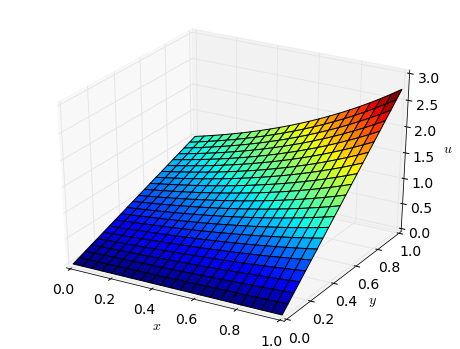

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, U, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
plt.show()

### Iterative methods for the linear system

Have constructed a second order convergent method. But *direct* matrix
solver takes ${\cal O}(N^3)$ operations, so typically looking at
${\cal O}(n^6)$ operations! Then consider extending to three
dimensions...

Instead note that the finite difference equations

$$\left[ u_{i-1, j} + u_{i+1,j} - 2 u_{i,j} \right] + \alpha \left[
u_{i, j-1} + u_{i,j+1} - 2 u_{i,j} \right] = h_x^2 f_{i,j}$$

in good form for an *iterative* method. These often work well for sparse
matrices, as here.

Gauss-Seidel or variants on the SOR methods are frequently used for
solving elliptic equations in this fashion.

### Example

The equation

$$u_{x x} + u_{y y} = -2 \pi^2 \sin(\pi x) \sin(\pi y)$$

on $(x,y) \in [0,1]^2$ with trivial boundary conditions is
straightforwardly solved.

Increasing resolution improves the accuracy steadily and we can see
second order convergence.

Spectral collocation methods
----------------------------

### Collocation methods

Collocation methods extend to elliptic equations. Work well on simple
domains with smooth boundary conditions.

Convergence is exceptionally fast; when these methods work, finite
differences cannot compete.

Summary
=======

-   Partial differential equations have (at least) two independent variables, either denoted $(x,y)$ for boundary value (elliptic) problems or $(t,x)$ for evolutionary (hyperbolic, parabolic) problems.

-   Boundary conditions are required to specify a unique solution. In evolutionary problems the conditions at $t=0$ are called initial conditions.

-   Elliptic equations are in some sense generalizations of boundary value problems.

-   Introducing an evenly spaced grid and used central differencing leads to a set of finite difference equations.

-   Using some natural ordering of the entries gives a linear system.

-   The linear system is sparse and is best solved with iterative methods.

-   Collocation methods, when they work, are much better.

